In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
A = pd.read_csv("churn_train.csv")
A.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [ ]:
print(A["Churn"].value_counts())

Churn
1.0    249999
0.0    190833
Name: count, dtype: int64


In [ ]:
data = pd.get_dummies(A,columns=["Gender","Subscription Type","Contract Length"],drop_first=True)
data = data.drop(columns=["CustomerID"])
data.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Male,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly
0,30.0,39.0,14.0,5.0,18.0,932.0,17.0,1.0,False,False,True,False,False
1,65.0,49.0,1.0,10.0,8.0,557.0,6.0,1.0,False,False,False,True,False
2,55.0,14.0,4.0,6.0,18.0,185.0,3.0,1.0,False,False,False,False,True
3,58.0,38.0,21.0,7.0,7.0,396.0,29.0,1.0,True,False,True,True,False
4,23.0,32.0,20.0,5.0,8.0,617.0,20.0,1.0,True,False,False,True,False


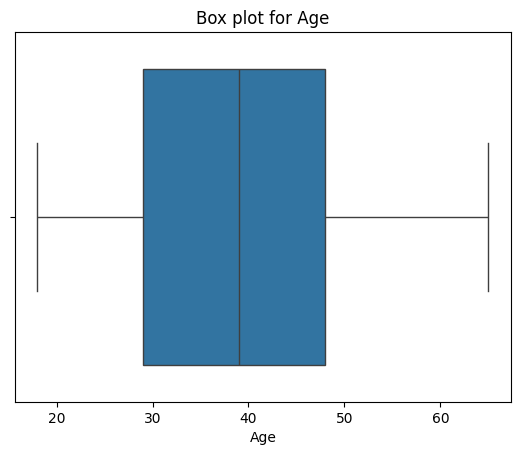

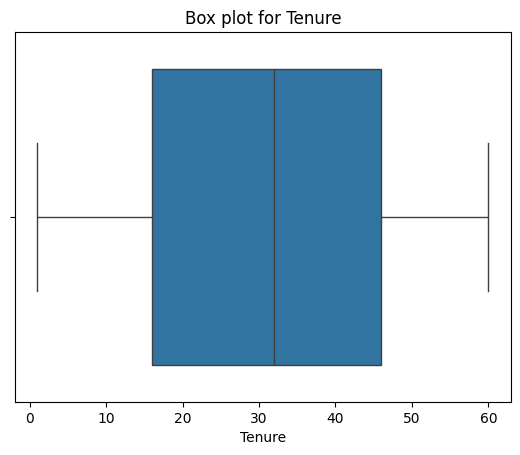

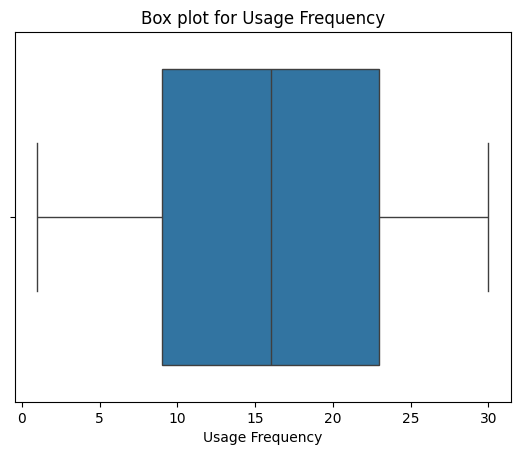

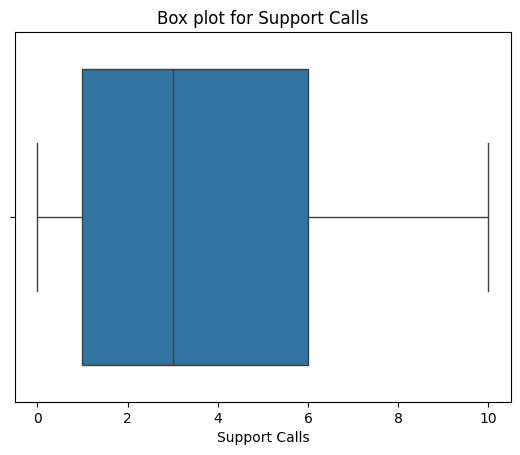

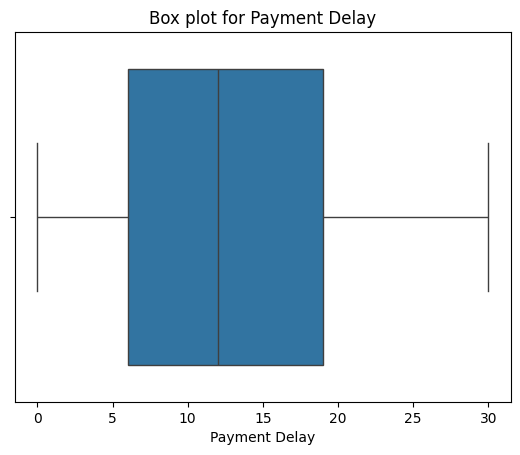

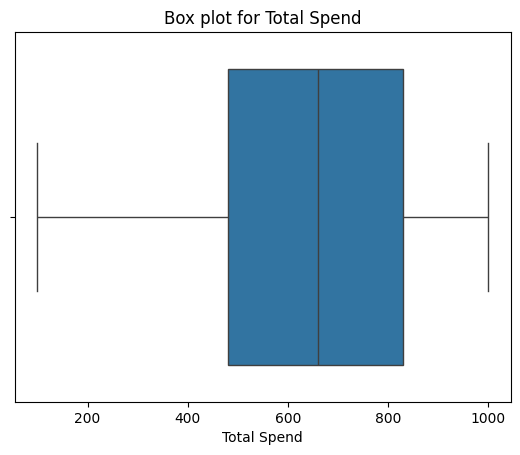

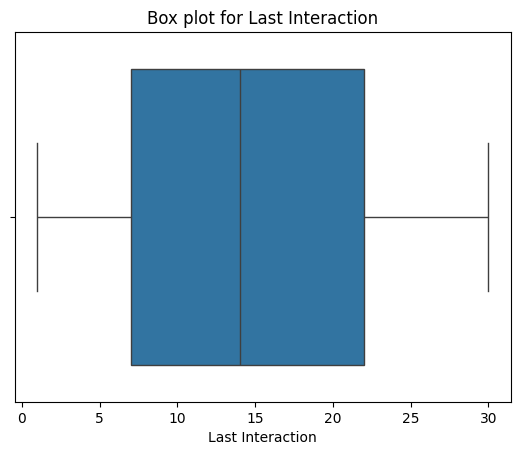

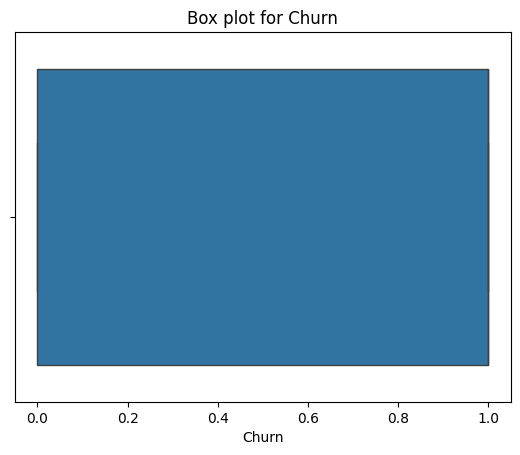

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Convert your dictionary to a DataFrame
df = pd.DataFrame(data)

# Plot box plots to visualize outliers
for column in df.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df[column])
    plt.title(f'Box plot for {column}')
    plt.show()



In [ ]:
cols_to_scale = ["Age", "Tenure", "Usage Frequency", "Support Calls",
                 "Payment Delay", "Total Spend", "Last Interaction"]

# Initialize the scaler
scaler = StandardScaler()

# Scale only the specified columns
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# Display the scaled DataFrame
print("Data after scaling:")
df.head()

Data after scaling:


,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Male,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly
0,-0.753326,0.448760,-0.210511,0.454549,0.609620,1.247427,0.293052,1.0,False,False,True,False,False
1,2.059646,1.028278,-1.724562,2.083100,-0.601319,-0.309865,-0.986584,1.0,False,False,False,True,False
2,1.255940,-1.000036,-1.375166,0.780259,0.609620,-1.854698,-1.335575,1.0,False,False,False,False,True
3,1.497051,0.390808,0.604748,1.105969,-0.722413,-0.978462,1.689018,1.0,True,False,True,True,False
4,-1.315921,0.043097,0.488282,0.454549,-0.601319,-0.060698,0.642043,1.0,True,False,False,True,False


Churn                         1.000000
Support Calls                 0.574267
Contract Length_Monthly       0.433553
Payment Delay                 0.312129
Age                           0.218394
Last Interaction              0.149616
Subscription Type_Standard   -0.009247
Subscription Type_Premium    -0.011072
Usage Frequency              -0.046101
Tenure                       -0.051919
Gender_Male                  -0.175395
Contract Length_Quarterly    -0.176244
Total Spend                  -0.429355
Name: Churn, dtype: float64


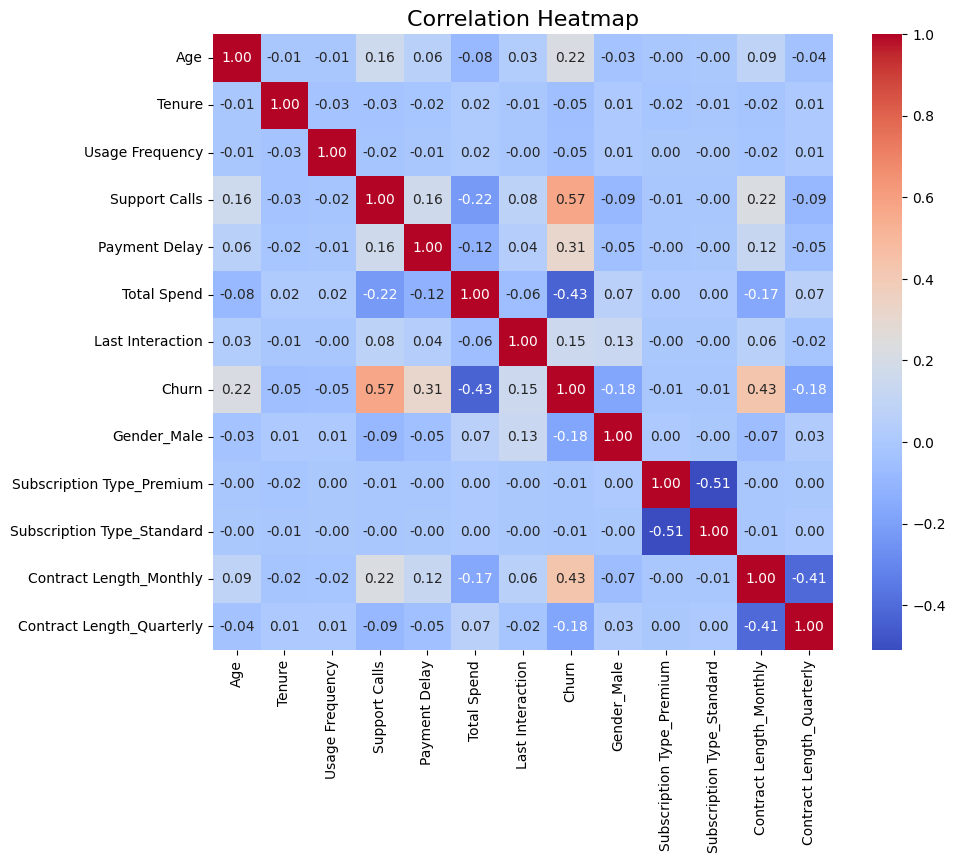

In [ ]:
corr = df.corr()
print(corr["Churn"].sort_values(ascending=False))

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Add a title
plt.title("Correlation Heatmap", fontsize=16)

# Show the plot
plt.show()